# Intégration numérique

L'intégration est une procédure analytique, que les ordinateurs ne savent pas calculer s'ils n'ont pas de base de raisonnement symbolique. On peut toutefois approcher les résultats analytiques à l'aide [d'approximations numériques des intégrales](https://fr.wikipedia.org/wiki/Calcul_num%C3%A9rique_d%27une_int%C3%A9grale). C'est ce que l'on étudie dans cette note.

In [1]:
import matplotlib.pyplot as plt

## Découpage des intégrales

Les intégrales simples de la forme $\int_{a}^{b} f\left(x\right) \,dx$ représentent l'aire sous la courbe représentée par la fonction $f\left(x\right)$ sur l'intervale $\left[a, b\right]$. On peut donc les calculer comme des sommes sur les sous-intervales : en prenant un $c$ quelconque sur l'axe réel pour lequel la fonction $f$ est définie, on a 

$$
\int_{a}^{b}f\left(x\right)\,dx=\int_{a}^{c}f\left(x\right)\,dx+\int_{c}^{b}f\left(x\right)\,dx
$$

relation connue sous le nom de [relation de Chasles](https://fr.wikipedia.org/wiki/Int%C3%A9gration_(math%C3%A9matiques)#Relation_de_Chasles).

En particulier, si on prend le point $c$ sur l'intervale $\left[a, b\right]$ : $c\in\left[a, b\right]$, alors on peut découper l'intégrale du début en eux intégrales sur des intervales plus petits. En répétant ce processus, on peut se ramener au calcul d'une somme d'intégrales simples, qui passent au plus près de la courbe délimitant l'aire recherchée. Dans la pratique, on utilise des formes géométriques simples pour calculerles aires élémentaires sur des tout petits intervales.

## Méthode des rectangles

Dans la méthode des rectangles, on coupe l'intervale en petits rectangles, de hauteurs données par la valeur de la fonction au milieu de l'intervale, et on somme l'ensemble des surfaces de ces rectangles. 

$$
\int_{a}^{b} f\left(x\right)\,dx \approx \left(b-a\right)\, f\left(\frac{a+b}{2}\right) \equiv M_{f}\left(a,b\right)
$$

Cette méthode est une illustration directe de la notion d'[intégrale de Riemann](https://fr.wikipedia.org/wiki/Int%C3%A9grale_de_Riemann).

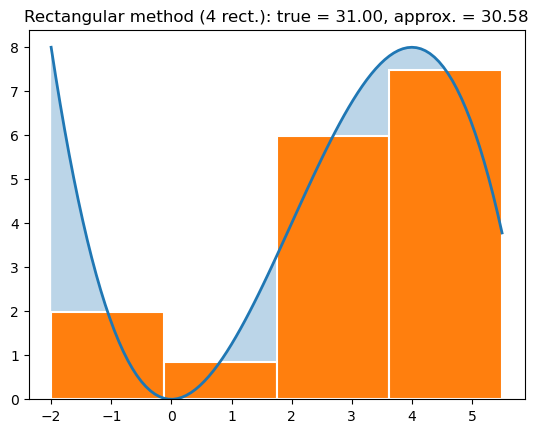

<Figure size 640x480 with 0 Axes>

In [19]:
f = lambda x: 3*x**2/2 - x**3/4
F = lambda x: x**3/2 - x**4/16

xmin, xmax = -2, 5.5
nb_points = 100
nb_rectangles = 4

def plot_rectangle(f=f,
                   F=F,
                   xmin=xmin,
                   xmax=xmax,
                   nb_points=nb_points,
                   nb_rectangles=nb_rectangles):
    x = [xmin + (xmax-xmin)*t/nb_points
         for t in range(nb_points+1)]
    t = [xmin + (xmax-xmin)/nb_rectangles/2 + (xmax-xmin)*t/nb_rectangles
         for t in range(nb_rectangles)]
    width = (xmax-xmin)/nb_rectangles
    fig, ax = plt.subplots()
    ax.fill_between(x,
                    [f(x) for x in x],
                    [0 for x in x],
                    alpha=.3, linewidth=0)
    ax.plot(x, [f(x) for x in x],
            linewidth=2)
    ax.bar(t, [f(t) for t in t],
           width=width,
           edgecolor="white",
           linewidth=8*width/10)
    true_value = F(xmax) - F(xmin)
    appr_value = sum(width*f(t) for t in t)
    title = f"Rectangular method ({nb_rectangles} rect.):"
    title += f" true = {true_value:.2f}, approx. = {appr_value:.2f}"
    ax.set_title(title)
    plt.show()
    plt.clf()
    return None

plot_rectangle(nb_rectangles = 4)

Regardons comment évolue l'erreur en fonction du nombre de rectangles employés pour l'évaluation numérique.

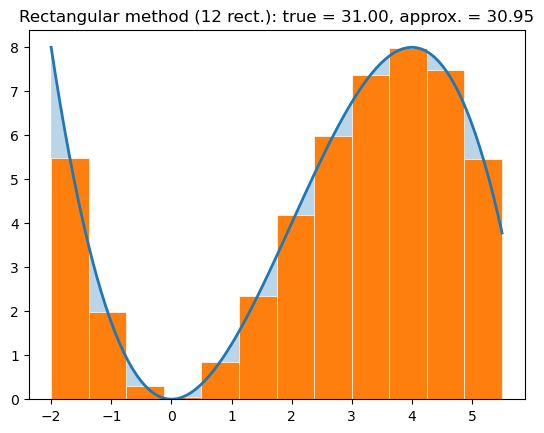

<Figure size 640x480 with 0 Axes>

In [11]:
plot_rectangle(nb_rectangles=12)

## Méthode des trapèzes

Dans la méthode des trapèzes, on coupe l'intervale en petits trapèzes, dont les sommets correspondents aux valeurs de la fonction aux bords des intervales.

$$
\int_{a}^{b} f\left(x\right)\, dx \approx \left(b-a\right) \left(\frac{f\left(a\right) + f\left(b\right)}{2}\right) \equiv T_{f}\left(a,b\right)
$$

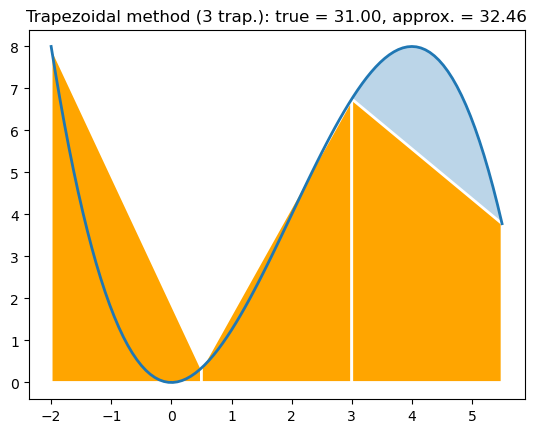

<Figure size 640x480 with 0 Axes>

In [24]:
nb_trapezoids = 2

def plot_trapezoid(f=f,
                   F=F,
                   xmin=xmin,
                   xmax=xmax,
                   nb_points=nb_points,
                   nb_trapezoids=nb_trapezoids):
    x = [xmin + (xmax-xmin)*t/nb_points
         for t in range(nb_points+1)]
    t = [xmin + (xmax-xmin)*t/nb_trapezoids
         for t in range(nb_trapezoids+1)]
    trapezoid_points = [(t1, t2, f(t1), f(t2))
                        for t1, t2 in zip(t[:-1], t[1:])]
    fig, ax = plt.subplots()
    ax.plot(x, [f(x) for x in x],
            linewidth=2)
    ax.fill_between(x,
                    [f(x) for x in x],
                    [0 for x in x],
                    alpha=.3, linewidth=0)
    for trapeze in trapezoid_points:
        ax.fill(trapeze[:2] + tuple(reversed(trapeze[:2])),
                 (0,0) + tuple(reversed(trapeze[2:])),
                 linewidth=8*(trapeze[1]-trapeze[0])/10,
                 facecolor="orange",
                 edgecolor="white",)
    true_value = F(xmax) - F(xmin)
    appr_value = sum((t[1]-t[0])*(t[2]+t[3])/2 for t in trapezoid_points)
    title = f"Trapezoidal method ({nb_trapezoids} trap.):"
    title += f" true = {true_value:.2f}, approx. = {appr_value:.2f}"
    ax.set_title(title)
    plt.show()
    plt.clf()
    return None

plot_trapezoid(nb_trapezoids=3)

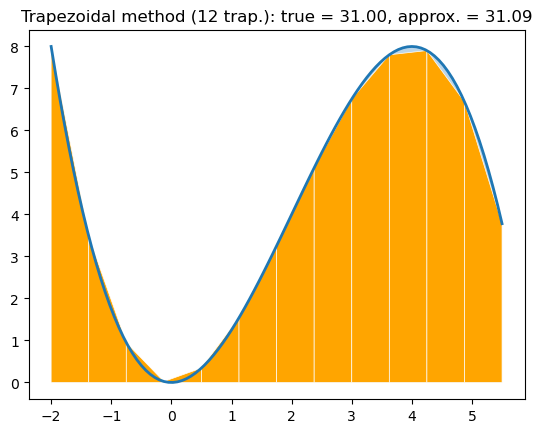

<Figure size 640x480 with 0 Axes>

In [25]:
plot_trapezoid(nb_trapezoids=12)

## Autres méthodes

Il existe d'autres méthodes plus poussées pour évaluer les intégrales numériquement. Par exemple la [méthode de Simpson](https://en.wikipedia.org/wiki/Simpson%27s_rule), pour laquelle on essaye de suivre la courbe en utilisant des interpolations (via des polynômes de Lagrange) 

$$
\int_a^b f(x) \, dx \approx \frac{b - a}{6} \left[f(a) + 4f\left(\frac{a + b}{2}\right) + f(b)\right] = \frac{T_{f}\left(a,b\right)+2M_{f}\left(a,b\right)}{3}
$$

qui minimise l'[erreur d'ordre 3 des deux précédentes méthodes](https://en.wikipedia.org/wiki/Simpson%27s_rule#Averaging_the_midpoint_and_the_trapezoidal_rules).

## Pour aller plus loin

L'article sur l'[intégration numérique](https://en.wikipedia.org/wiki/Numerical_integration) de Wikipédia est une bonne introduction aux méthodes numériques d'intégration et à leurs difficultés.

On n'a présenté ici que le cas des intégrales simples de fonction d'une seule variable. Les [intégrations de fonctions vectorielle ou de champs de vecteurs posent des défis importants pour les sciences physiques](https://fr.wikipedia.org/wiki/Forme_diff%C3%A9rentielle).